### Light Theme and Dark Theme: Case Study

An online bookstore is looking to optimize its website design to improve user engagement and ultimately increase book purchases. The website currently offers two themes for its users: “Light Theme” and “Dark Theme.” The bookstore’s data science team wants to conduct an A/B testing experiment to determine which theme leads to better user engagement and higher conversion rates for book purchases.

The data collected by the bookstore contains user interactions and engagement metrics for both the Light Theme and Dark Theme. The dataset includes the following key features:

* Theme: dark or light
* Click Through Rate: The proportion of the users who click on links or buttons on the website.
* Conversion Rate: The percentage of users who signed up on the platform after visiting for the first time.
* Bounce Rate: The percentage of users who leave the website without further interaction after visiting a single page.
* Scroll Depth: The depth to which users scroll through the website pages.
* Age: The age of the user.
* Location: The location of the user.
* Session Duration: The duration of the user’s session on the website.
* Purchases: Whether the user purchased the book (Yes/No).
* Added_to_Cart: Whether the user added books to the cart (Yes/No).


- [x] Your task is to identify which theme, Light Theme or Dark Theme, yields better user engagement, purchases and conversion rates. You need to determine if there is a statistically significant difference in the key metrics between the two themes.

- [x] link to the [dataset](https://statso.io/light-theme-and-dark-theme-case-study/?fbclid=PAAaZaYdKSwTzTqtvWIuKxewxMK32qAqVQFrM58Q8J2f4qoUgfliwhGoosroM)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore")

### Approach

1. Define the metrics that you want to compare between the two themes. For example, you might want to compare the number of page views, the number of clicks on the "Buy" button, and the conversion rate (i.e. the percentage of users who make a purchase).

2. Collect the data for each metric for both the Light Theme and Dark Theme. You can use tools like Google Analytics or Mixpanel to collect this data.

3. Perform a hypothesis test to determine if there is a statistically significant difference between the two themes for each metric. You can use a t-test or ANOVA test for this.

4. Analyze the results of the hypothesis test to determine which theme yields better user engagement, purchases, and conversion rates.

5. Present your findings in a clear and concise manner, including any visualizations that help to illustrate your results.

In [3]:
#read the dataset
data = pd.read_csv('website_ab_test.csv')
data.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [4]:
data.isnull().sum()


Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

* [x] no missing values, we will assume the data is already pre-processed

### 1. Define metrics

* compare between two themes `Light` and `Dark` theme
* `Click Through Rate (CTR)`: The percentage of usets who click on a link or button
* `Conversion Rate (CR)`: The percentage of users who make a purchase.
* `Bouce Rate (BR)`: The percentage of users who leave the website after viewing only one page
* ` Session Duration (SD)`: The duration of the user's session on the website

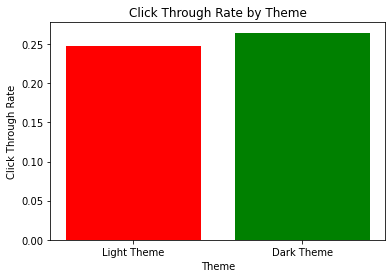

In [6]:
#Calculate the CTR for each theme
from turtle import color


light_theme_ctr = data[data['Theme'] == 'Light Theme']['Click Through Rate'].mean()
dark_theme_ctr = data[data['Theme'] == 'Dark Theme']['Click Through Rate'].mean()

#plot the CTR for each theme
plt.bar(['Light Theme', 'Dark Theme'], [light_theme_ctr, dark_theme_ctr], color= ['r','g'])
plt.title('Click Through Rate by Theme')
plt.xlabel('Theme')
plt.ylabel('Click Through Rate')
plt.show()

In [7]:
# Calculate the CR for each theme
light_theme_cr = data[data['Theme']=='Light Theme']['Conversion Rate'].mean()
dark_theme_cr = data[data['Theme']=='Dark Theme']['Conversion Rate'].mean()

print('Light Theme CR:', light_theme_cr)
print('Dark Theme CR:', dark_theme_cr)

Light Theme CR: 0.25545931706801417
Dark Theme CR: 0.25128197366022825


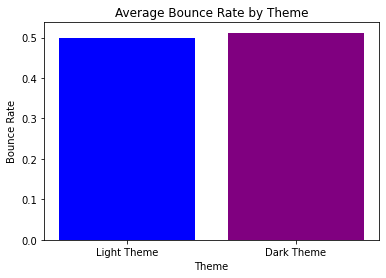

In [9]:
#calculate the Bouce Rate for each theme
light_theme_br = data[data['Theme'] == 'Light Theme']['Bounce Rate'].mean()
dark_theme_br = data[data['Theme'] == 'Dark Theme']['Bounce Rate'].mean()

plt.bar(['Light Theme','Dark Theme'],[light_theme_br,dark_theme_br], color=['b', 'purple'])
plt.title('Average Bounce Rate by Theme')
plt.xlabel('Theme')
plt.ylabel('Bounce Rate')
plt.show()

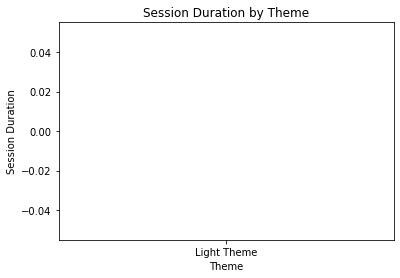

In [11]:
#Calculate the Session Duration for each theme
light_theme_sd = data[data['Theme']=='Light Them']['Session_Duration'].mean()
dark_theme_sd = data[data['Theme']=='Dark Them']['Session_Duration'].mean()

plt.bar(['Light Theme','Dark Theme'],[light_theme_sd,dark_theme_sd], color=['orange', 'green'])
plt.title('Session Duration by Theme')
plt.xlabel('Theme')
plt.ylabel('Session Duration')
plt.show()

### 3. Hypothesis testing

* determine if there is a statistically significant between two themes for each metric.

1. Define the null hypothesis (H0) and alternative hypothesis (H1) for each metric. For example, for the Click Through Rate metric, the null hypothesis might be that there is no difference in CTR between the Light Theme and Dark Theme, while the alternative hypothesis might be that there is a difference in CTR between the two themes.

2. Choose a significance level (alpha) for the test. The most common value for alpha is 0.05, which means that you are willing to accept a 5% chance of making a Type I error (i.e. rejecting the null hypothesis when it is actually true).

3. Choose an appropriate statistical test for each metric. For example, you can use a t-test or ANOVA test to compare the means of two or more groups.

4. Calculate the test statistic and p-value for each test.

5. Compare the p-value to the significance level (alpha) to determine if the results are statistically significant. If the p-value is less than alpha, then you can reject the null hypothesis and conclude that there is a statistically significant difference between the two themes for that metric.

6. Repeat steps 3-5 for each metric.


H0: (u_1 = u_2) - > Theres is no difference in CTR between the light theme and dark theme

H1: (u_1 != u_2) - > There is a difference in CTR between light and dark theme

t-statistic: -1.977
p-value: 0.048


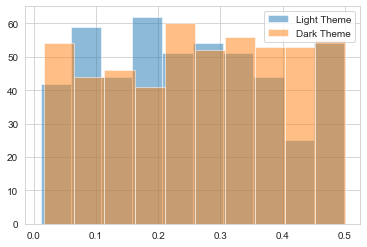

In [19]:
# Perform a t-test to compare two themes
from scipy.stats import ttest_ind
#calculate the mean CTR for each theme
light_theme_ctrr = data[data['Theme']=='Light Theme']['Click Through Rate']
dark_theme_ctrr = data[data['Theme']=='Dark Theme']['Click Through Rate']
# Calculate the t-statistic and p-value
t_stat, p_val = ttest_ind(light_theme_ctrr, dark_theme_ctrr)
print('t-statistic: {:.3f}'.format(t_stat)
      + '\np-value: {:.3f}'.format(p_val))

plt.hist(light_theme_ctrr, alpha=0.5, label='Light Theme')
plt.hist(dark_theme_ctrr, alpha=0.5, label='Dark Theme')
plt.legend()
plt.show()

#### Intepretation

* Based on the t-test results above
* t-statistic is `-1.977` and the p_value is `0.048`.
* Since the `p-value` is less than the significance level of `0.05`.
* `REJECT` the null hypothesis and conclude that
* there is a statistically significant difference in Click Through Rate between the Light Theme and Dark Theme

H0: There is no difference in CR between two themes

H1: There is a difference in CR between two themes

t-statistic: 0.474
p-value: 0.635


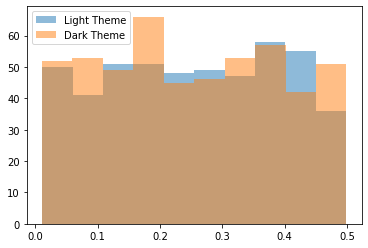

In [15]:

light_theme_crr = data[data['Theme']=='Light Theme']['Conversion Rate']
dark_theme_crr = data[data['Theme']=='Dark Theme']['Conversion Rate']
#calculate the t-statistic and p-value

t_statistic, p_value = ttest_ind(light_theme_crr, dark_theme_crr)
print('t-statistic: {:.3f}\np-value: {:.3f}'.format(t_statistic, p_value))

#plot the histogram
plt.hist(light_theme_crr, alpha=0.5, label='Light Theme')
plt.hist(dark_theme_crr, alpha=0.5, label='Dark Theme')
plt.legend()
plt.show()


#### Interpretation
* Based on t-test results above
* `t-statistic: 0.474` and `p-value:0.635`
* Since `p-value` > than `alpha=0.05`
* we `fail to reject` the null hypothesis
* conclude that, there is no statistically difference in `Coversion Rate` between two themes

H0: No significance in `Bounce Rate` between two themes

H1: Significance in `Bounce Rate` between two themes

t-statistic: -1.201
p-value: 0.230


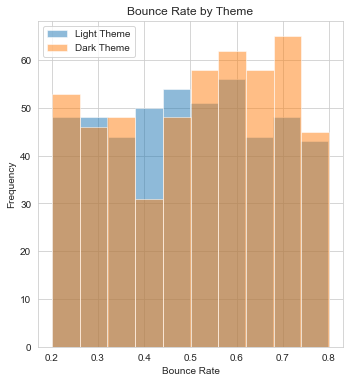

In [18]:
light_theme_brr = data[data['Theme']=='Light Theme']['Bounce Rate']
dark_theme_brr = data[data['Theme']=='Dark Theme']['Bounce Rate']

#calculate the t-stats and p-value
t_stat, p_value = ttest_ind(light_theme_brr, dark_theme_brr)
print('t-statistic: {:.3f}\np-value: {:.3f}'.format(t_stat, p_value))

#plot the histograms
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.subplot(121)
plt.hist(light_theme_brr, alpha=0.5, label='Light Theme')
plt.hist(dark_theme_brr, alpha=0.5, label='Dark Theme')
plt.title('Bounce Rate by Theme')
plt.xlabel('Bounce Rate')
plt.ylabel('Frequency')
plt.legend();

### Interpretation

* Based on the t-tests aboce
* `t-statistic: -1.201` and `p-value: 0.230`
*  Since `p-value` > `alpha=0.05`
* `fail to reject` the H0 and conclude that,
* there is no significant difference in `Bounce Rate` between two themes

In [21]:
from math import sqrt
from numpy import mean
from py import std
from scipy.stats import ttest_ind


metrics = ['Click Through Rate','Conversion Rate', 'Bounce Rate']
themes = ['Light Theme', 'Dark Theme']
#loop through each metric
for metric in metrics:
    print('Metric: ', metric)

    #loop through each theme
    for i in range(len(themes)):
        for j in range(i+1, len(themes)):
            theme1 = themes[i]
            theme2 = themes[j]

            #calculate the mean and standard deviation  for each theme
            mean1 = mean(data[data['Theme'] == theme1][metric])
            mean2 = mean(data[data['Theme'] == theme2][metric])
            std1 = np.std(data[data['Theme'] == theme1][metric])
            std2 = np.std(data[data['Theme'] == theme2][metric])

            #calculate the t-statistic and pvalue for the two groupd
            n1 = len(data[data['Theme'] == theme1][metric])
            n2 = len(data[data['Theme'] == theme2][metric])
            dof = n1 + n2 - 2
            pooled_std = sqrt(((n1-1)*(std1**2) + (n2-1)*(std2**2))/dof)
            t_stat =(mean1-mean2)/ (pooled_std * sqrt(1/n1 + 1/n2))
            p_val = 2 * (1 - ttest_ind(data[data['Theme'] == theme1][metric], data[data['Theme'] == theme2][metric]).pvalue)

            #calculate the effect size (Cohen's d)
            effect_size = (mean1-mean2)/ pooled_std
            #print the results for the two groups
            print(theme1, 'vs', theme2)
            print('Mean:', theme1, ':', mean1)
            print('Mean:', theme2, ':', mean2)
            print('Standard Deviation:', theme1, ':', std1)
            print('Standard Deviation:', theme2, ':', std2)
            print('T-statistic:', t_stat)
            print('P-value:', p_val)
            print('Effect Size (Cohen\'s d):', effect_size)
            print()

Metric:  Click Through Rate
Light Theme vs Dark Theme
Mean: Light Theme : 0.24710871082680833
Mean: Dark Theme : 0.2645008624648531
Standard Deviation: Light Theme : 0.13701534155107406
Standard Deviation: Dark Theme : 0.14070479524015167
T-statistic: -1.9786798510981485
P-value: 1.9032993771883502
Effect Size (Cohen's d): -0.12519178659791355

Metric:  Conversion Rate
Light Theme vs Dark Theme
Mean: Light Theme : 0.25545931706801417
Mean: Dark Theme : 0.25128197366022825
Standard Deviation: Light Theme : 0.1370754218532656
Standard Deviation: Dark Theme : 0.14080826283305123
T-statistic: 0.4749676746116689
P-value: 0.7294953691225365
Effect Size (Cohen's d): 0.03005137578365212

Metric:  Bounce Rate
Light Theme vs Dark Theme
Mean: Light Theme : 0.4990347635354322
Mean: Dark Theme : 0.5121146388541841
Standard Deviation: Light Theme : 0.16915668219087443
Standard Deviation: Dark Theme : 0.1746169453683328
T-statistic: -1.2020224115394031
P-value: 1.5397887499420189
Effect Size (Cohen's